In [1]:
import sys
sys.path.append("../../src")

# Production study: givenness manipulation

We present minimal-pair sentence sequences where a first sentence establishes a clear discourse referent -- either the agent/theme or the location of an event.

Open Qs:

1. Does the discourse manipulation actually work?
2. Assuming the discourse manipulation is effective, do subjects use the *swarm*-alternation to place the given item as a pronominal in subject position (vs. as a pronominal elsewhere)?

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [5]:
import data

In [6]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id",
                             "practice_sentence"))

EXPERIMENT_ID = "06_production_spray-load-weight"
response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "survey-multi-choice-ext")] \
    .reset_index().set_index(["uniqueid", "trial_index"])

Missing datastring for uid A1I3TPX8GA7ISU:3634BBTX0PI2DDMJKQL1T7BJTU3IF4. Status was 1.
Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid debugL9306E:debugJT1KTE. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A29P13MOYA3EXB:3UN61F00HXDN4FWD41207SOC265R5H. Status was 1.
Missing datastring for uid debugLTJDLS:debugASO9PP. Status was 1.


In [7]:
response_df.head()

condition  counterbalance assignmentId  \
uniqueid                trial_index                                           
debugLTJDLT:debugASO9PP 3                    0               0  debugASO9PP   
                        5                    0               0  debugASO9PP   
                        6                    0               0  debugASO9PP   
                        7                    0               0  debugASO9PP   
                        8                    0               0  debugASO9PP   

                                        workerId        hitId  \
uniqueid                trial_index                             
debugLTJDLT:debugASO9PP 3            debugLTJDLT  debug0X5WKF   
                        5            debugLTJDLT  debug0X5WKF   
                        6            debugLTJDLT  debug0X5WKF   
                        7            debugLTJDLT  debug0X5WKF   
                        8            debugLTJDLT  debug0X5WKF   

                                                  trial_type      rt  \
uniqueid                trial_index                                    
debugLTJDLT:debugASO9PP 3            survey-multi-choice-ext  1279.1   
                        5            survey-multi-choice-ext  3082.9   
                        6            survey-multi-choice-ext  2313.0   
                        7            survey-multi-choice-ext  2830.4   
                        8            survey-multi-choice-ext  2468.7   

                                    internal_node_id       dateTime  \
uniqueid                trial_index                                   
debugLTJDLT:debugASO9PP 3                    0.0-3.0  1632859667736   
                        5                    0.0-5.0  1632859671476   
                        6                    0.0-6.0  1632859673792   
                        7                    0.0-7.0  1632859676626   
                        8                    0.0-8.0  1632859679098   

                                                       experiment_id  \
uniqueid                trial_index                                    
debugLTJDLT:debugASO9PP 3            06_production_spray-load-weight   
                        5            06_production_spray-load-weight   
                        6            06_production_spray-load-weight   
                        7            06_production_spray-load-weight   
                        8            06_production_spray-load-weight   

                                                  materials_id  item_id  \
uniqueid                trial_index                                       
debugLTJDLT:debugASO9PP 3                                 None      NaN   
                        5            spray-load-002-indefinite      7.0   
                        6            spray-load-002-indefinite     43.0   
                        7            spray-load-002-indefinite     25.0   
                        8            spray-load-002-indefinite     16.0   

                                     condition_id practice_sentence  \
uniqueid                trial_index                                   
debugLTJDLT:debugASO9PP 3                    None              True   
                        5            [None, 1, 0]              None   
                        6            [None, 0, 1]              None   
                        7            [None, 1, 0]              None   
                        8            [None, 0, 1]              None   

                                     survey_question_idx survey_answer  \
uniqueid                trial_index                                      
debugLTJDLT:debugASO9PP 3                              0          good   
                        5                              0             0   
                        6                              0             0   
                        7                              0             1   
                        8                          

In [9]:
# Expand condition labels, which are tuples
response_df = pd.concat([response_df, response_df.condition_id.apply(pd.Series).rename(columns=lambda x: f"condition_{x}")], axis=1) \
    .drop(columns="condition_id")

In [10]:
# Convert condition_id to independent features
response_df["location_is_heavy"] = response_df["condition_1"] == 1
response_df["theme_is_heavy"] = response_df["condition_2"] == 1

In [11]:
# dtype fixes
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [12]:
response_df.head()

condition  counterbalance assignmentId  \
uniqueid                trial_index                                           
debugLTJDLT:debugASO9PP 3                    0               0  debugASO9PP   
                        5                    0               0  debugASO9PP   
                        6                    0               0  debugASO9PP   
                        7                    0               0  debugASO9PP   
                        8                    0               0  debugASO9PP   

                                        workerId        hitId  \
uniqueid                trial_index                             
debugLTJDLT:debugASO9PP 3            debugLTJDLT  debug0X5WKF   
                        5            debugLTJDLT  debug0X5WKF   
                        6            debugLTJDLT  debug0X5WKF   
                        7            debugLTJDLT  debug0X5WKF   
                        8            debugLTJDLT  debug0X5WKF   

                                                  trial_type      rt  \
uniqueid                trial_index                                    
debugLTJDLT:debugASO9PP 3            survey-multi-choice-ext  1279.1   
                        5            survey-multi-choice-ext  3082.9   
                        6            survey-multi-choice-ext  2313.0   
                        7            survey-multi-choice-ext  2830.4   
                        8            survey-multi-choice-ext  2468.7   

                                    internal_node_id                dateTime  \
uniqueid                trial_index                                            
debugLTJDLT:debugASO9PP 3                    0.0-3.0 2021-09-28 20:07:47.736   
                        5                    0.0-5.0 2021-09-28 20:07:51.476   
                        6                    0.0-6.0 2021-09-28 20:07:53.792   
                        7                    0.0-7.0 2021-09-28 20:07:56.626   
                        8                    0.0-8.0 2021-09-28 20:07:59.098   

                                                       experiment_id  ...  \
uniqueid                trial_index                                   ...   
debugLTJDLT:debugASO9PP 3            06_production_spray-load-weight  ...   
                        5            06_production_spray-load-weight  ...   
                        6            06_production_spray-load-weight  ...   
                        7            06_production_spray-load-weight  ...   
                        8            06_production_spray-load-weight  ...   

                                    practice_sentence  survey_question_idx  \
uniqueid                trial_index                                          
debugLTJDLT:debugASO9PP 3                        True                    0   
                        5                        None                    0   
                        6                        None                    0   
                        7                        None                    0   
                        8                        None                    0   

                                    survey_answer  slider_value slider_copout  \
uniqueid                trial_index                                             
debugLTJDLT:debugASO9PP 3                    good           NaN           NaN   
                        5                       0           NaN           NaN   
                        6                       0           NaN           NaN   
                        7                       1           NaN           NaN   
                        8                       0           NaN           NaN   

                                     condition_0 condition_1 condition_2  \
uniqueid                trial_index                                        
debugLTJDLT:debugASO9PP 3                    NaN         NaN         NaN   
                        5                    NaN         1.0         0.0   
  

In [13]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [14]:
subjects = set(response_df.index.get_level_values("uniqueid"))
len(subjects)

1

### Demo

In [15]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

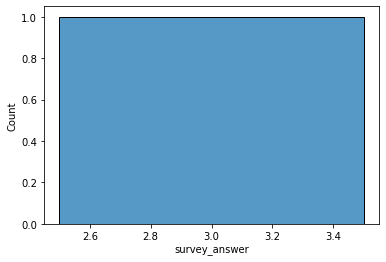

In [16]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [17]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Master's degree    1
Name: survey_answer, dtype: int64

In [18]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    1
Name: survey_answer, dtype: int64

### Comments

In [19]:
qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer

trial_index  uniqueid               
37           debugLTJDLT:debugASO9PP    thx
Name: survey_answer, dtype: object

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

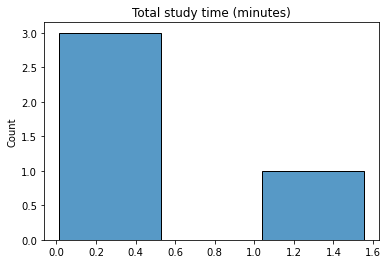

In [20]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [21]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    0.416482
std     0.758061
Name: rt, dtype: float64

### Response times

In [22]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

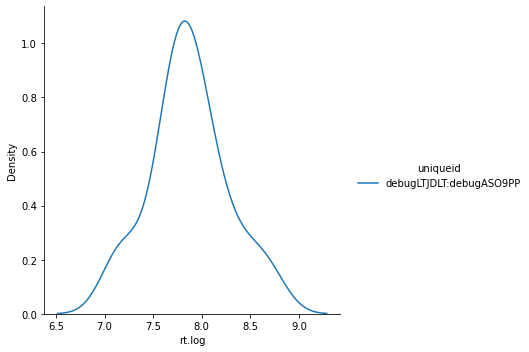

In [23]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

## Attention checks

### Practice round

In [24]:
practice_attention_failures = response_df[response_df.practice_sentence == True].survey_answer == "bad"
practice_attention_failures = practice_attention_failures.loc[practice_attention_failures]
practice_attention_failures

Series([], Name: survey_answer, dtype: bool)

### Fillers

<AxesSubplot:xlabel='survey_answer'>

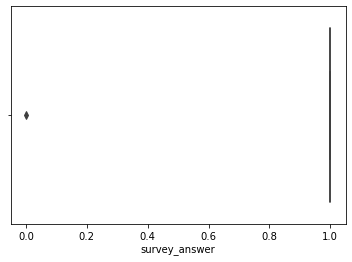

In [26]:
# some fillers aren't good, upon reflection. drop them from evaluation
drop_fillers = []

filler_stats = response_df[response_df.condition_0 == "filler"].reset_index() \
    .groupby(["uniqueid", "item_id", "condition_1"]).apply(lambda xs: (xs[~xs.item_id.isin(drop_fillers)].survey_answer == "good").astype(float))
sns.boxplot(data=filler_stats.reset_index(), x="survey_answer", hue="uniqueid")

In [27]:
filler_stats_summary = filler_stats.groupby("uniqueid").mean()
filler_stats_summary.sort_values()

uniqueid
debugLTJDLT:debugASO9PP    0.916667
Name: survey_answer, dtype: float64

<AxesSubplot:xlabel='item_id', ylabel='survey_answer'>

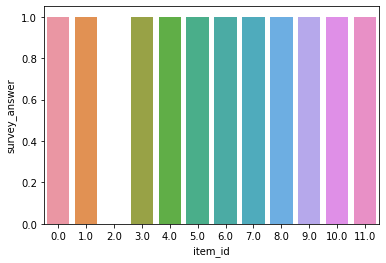

In [28]:
sns.barplot(data=filler_stats.reset_index(), x="item_id", y="survey_answer")

In [29]:
# What are fillers that are commonly missed, for high-scoring people?
tmp = filler_stats.loc[filler_stats_summary[filler_stats_summary > 0.7].index]
tmp[tmp == 0].groupby(["item_id", "condition_1"]).size().sort_values(ascending=False)

item_id  condition_1
2.0      order          1
Name: survey_answer, dtype: int64

## Final data processing

In [30]:
exp_items = response_df[(response_df.condition_0 != "filler") & response_df.practice_sentence.isna()]

### Filter based on practice and attention checks

In [31]:
drop_pct = np.round(len(practice_attention_failures) / len(filler_stats_summary.index) * 100, 1)
print(f"{len(practice_attention_failures)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(practice_attention_failures.index.get_level_values("uniqueid")))
exp_items = exp_items.drop(practice_attention_failures.index.get_level_values("uniqueid"), level="uniqueid")

attention_drops = filler_stats_summary[(filler_stats_summary < 0.7)]
drop_pct = np.round(len(attention_drops) / len(filler_stats_summary.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

0 subjects (0.0%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	
0 subjects (0.0%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	


In [32]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

1 subjects remaining.


### Compute match

In [37]:
exp_items["theme_is_object"] = exp_items.survey_answer == 1

In [38]:
exp_items["match"] = ~(exp_items.theme_is_heavy & exp_items.theme_is_object)

### Merge in materials

In [40]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["item_key"] = materials_df.V.str.cat(materials_df["T"], sep=" ")

# NB this doesn't handle fillers correctly

In [41]:
keep_cols = ["item_key", "T", "T heavy", "L", "L heavy", "V", "scale type", "T plural?", "T mass?", "L plural?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Export

In [42]:
merged_df.to_csv("merged_df.csv")

## Analysis

<AxesSubplot:ylabel='match'>

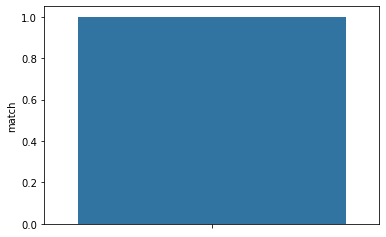

In [44]:
sns.barplot(data=exp_items.reset_index(), y="match")

### Item exposure

In [45]:
merged_df[merged_df.condition_0 != "filler"] \
    .groupby(["item_id", "item_key", "theme_is_heavy"]).size().sort_values()

item_id  item_key                  theme_is_heavy
0.0      brush powder              True              1
38.0     stock spices              False             1
36.0     stack books               False             1
35.0     squirt water              True              1
34.0     sprinkle nuts             False             1
32.0     spray paint               False             1
26.0     smear grease              True              1
25.0     slather mayonnaise        False             1
19.0     rub marinade              True              1
16.0     plant lavender seedlings  True              1
14.0     pack soil                 False             1
12.0     load hay                  True              1
10.0     inject jelly              True              1
9.0      heap appetizers           True              1
7.0      dust sugar                False             1
6.0      drizzle frosting          True              1
4.0      dab ointment              False             1
1.0      cram c

### Influence of weight

### Other control variables

<AxesSubplot:xlabel='T plural?', ylabel='match'>

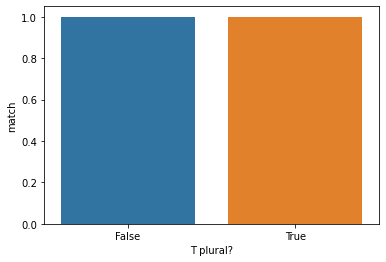

In [46]:
sns.barplot(data=merged_df.reset_index(), x="T plural?", y="match")

<AxesSubplot:xlabel='T mass?', ylabel='match'>

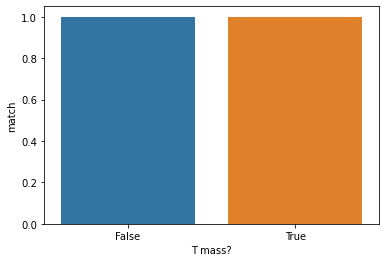

In [48]:
sns.barplot(data=merged_df.reset_index(), x="T mass?", y="match")

<AxesSubplot:xlabel='L plural?', ylabel='match'>

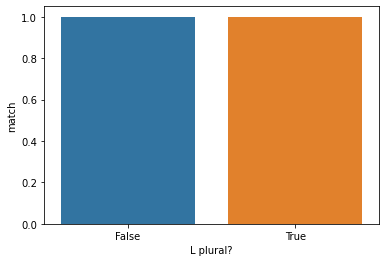

In [47]:
sns.barplot(data=merged_df.reset_index(), x="L plural?", y="match")

### By item

<AxesSubplot:xlabel='Theme object(Light - Heavy)', ylabel='Count'>

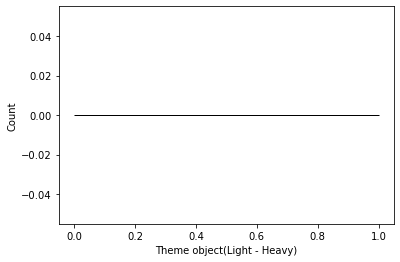

In [49]:
def compute_item_differences(rows):
    rows = rows.set_index("theme_is_heavy")
    if True not in rows.index or False not in rows.index:
        return np.nan
    return rows.loc[False, "theme_is_object"].mean() - rows.loc[True, "theme_is_object"].mean()
item_differences = merged_df.groupby(["item_id", "item_key"]).apply(compute_item_differences).rename("Theme object(Light - Heavy)")
sns.histplot(item_differences)